<h1>GRIP Task 2</h1>
<h2>KMeans clustering and BIRCH clustering</h2>
Author: Aljesh Basnet

In this notebook, kmeans clustering and birch clustering algorithm are used to cluster the species of iris dataset. Both of the algorithm are example of unsupervised Machine learning. The models score are measured and the model with the better score is finalized as the model that clusters the best for the dataset.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# Loading the csv dataset
df= pd.read_csv('iris.csv')

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
# Identifying unique species 
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Selecting the input for the model
X =df.iloc[:,[0,1,2,3]]
X

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0      1            5.1           3.5            1.4
1      2            4.9           3.0            1.4
2      3            4.7           3.2            1.3
3      4            4.6           3.1            1.5
4      5            5.0           3.6            1.4
..   ...            ...           ...            ...
145  146            6.7           3.0            5.2
146  147            6.3           2.5            5.0
147  148            6.5           3.0            5.2
148  149            6.2           3.4            5.4
149  150            5.9           3.0            5.1

[150 rows x 4 columns]

In [6]:
# Converting the selected input to array
X= X.values
X

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [7]:
# Importing k-means clustering algorithm and birch algorithm
from sklearn.cluster import KMeans, Birch

<h2>KMeans</h2>
K means clustering starts by choosing the number k of clusters.

The second step includes allcoating k random points as centroids.

The dataset points will be allocated to the centroid which is closest to them.

The centroid of individual clusters is calculated and the old centroid is placed there.

The points are then reassigned and if the reassignment does not takes place then the model has converged 
and if not the fourth step is repeated.

In [8]:
# The number of clusters is chosen
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

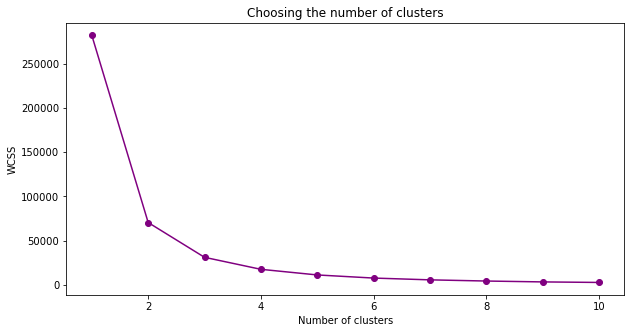

In [9]:
# plotting the number of clusters against performance
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o',color="purple")
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# defining, training the model and making predictions with the kmeans model
kmeans=KMeans(n_clusters=3,init='k-means++', random_state=42)
y_kmeans =kmeans.fit_predict(X)

In [11]:
# measuring the kmeans model
silhouette_score(X,y_kmeans)

0.5820898597618552

<h2>Birch</h2>
Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) generates a smaller dataset which is a compact summary of the larger dataset. The smaller dataset retains information from the larger dataset. It constructs a tree data structure where the leaves are the centroids of the cluster.

In [12]:
# defining, training the model and making predictions with the birch model
birch = Birch(threshold=1, n_clusters=3)
ybirch=birch.fit_predict(X)

In [13]:
silhouette_score(X,ybirch)

0.5506230439568367

In [14]:
# Identifying the centroids of kmeans model
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [15]:
# Identifying the centroids of birch
birch.subcluster_centers_

array([[  2.        ,   4.9       ,   3.23333333,   1.36666667],
       [  5.        ,   5.        ,   3.53333333,   1.53333333],
       [  8.        ,   4.66666667,   3.23333333,   1.43333333],
       [ 11.        ,   5.03333333,   3.4       ,   1.53333333],
       [ 13.5       ,   4.55      ,   3.        ,   1.25      ],
       [ 16.        ,   5.63333333,   4.1       ,   1.33333333],
       [ 19.        ,   5.3       ,   3.7       ,   1.53333333],
       [ 22.        ,   5.03333333,   3.56666667,   1.4       ],
       [ 25.        ,   4.96666667,   3.23333333,   1.73333333],
       [ 28.        ,   5.13333333,   3.43333333,   1.5       ],
       [ 31.        ,   4.96666667,   3.23333333,   1.56666667],
       [ 34.        ,   5.2       ,   3.8       ,   1.46666667],
       [ 37.        ,   5.13333333,   3.26666667,   1.33333333],
       [ 40.        ,   4.83333333,   3.3       ,   1.36666667],
       [ 42.5       ,   4.45      ,   2.75      ,   1.3       ],
       [ 45.        ,   4

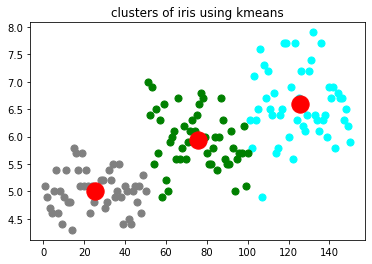

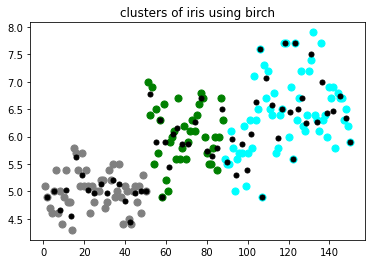

In [16]:
# Visualizing the clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],
            c='cyan',label='Iris-setosa', s=50)
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],
            c='grey', label='Iris-versicolor', s=50)
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],
            c='green', label='Iris-virginica', s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            color='red', label='Centroids',s=300)
plt.title('clusters of iris using kmeans')

plt.show()

# Visualizing the clusters
plt.scatter(X[ybirch==0,0], X[ybirch==0,1],
            c='cyan',label='Iris-setosa', s=50)
plt.scatter(X[ybirch==1,0], X[ybirch==1,1],
            c='grey', label='Iris-versicolor', s=50)
plt.scatter(X[ybirch==2,0], X[ybirch==2,1],
            c='green', label='Iris-virginica', s=50)
plt.scatter(birch.subcluster_centers_[:,0],birch.subcluster_centers_[:,1],
            color='black', label='Centroids',s=25)
plt.title('clusters of iris using birch')

plt.show()

KMeans model clusters the species of the iris dataset better than the BIRCH model.